In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

Upwind Scheme - CFL Number: 0.9980000000000001


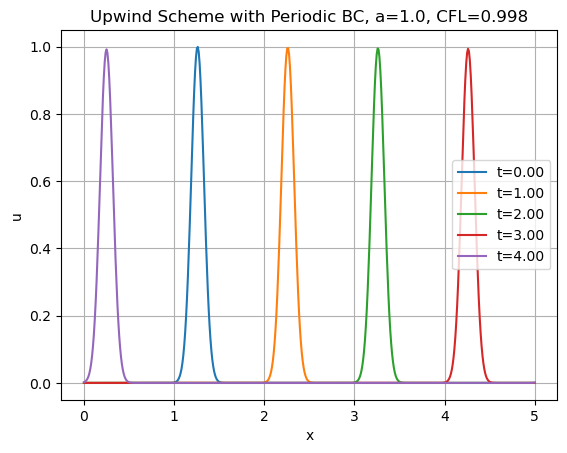

In [ ]:
# Define parameters
nx = 300          # Number of spatial points
L = 5.0           # Domain length
dx = L / (nx - 1) # Spatial resolution
dt = 0.01         # Time step (CFL < 1 for stability)
a = 0.8           # Advection speed
T = 5.0           # Total simulation time
Nt = int(T / dt)  # Number of time steps

# For linear advection, CFL=1 is optimal, lower CFL will become more diffusive and dispersive
CFL = a * dt / dx
print(f"Upwind Scheme - CFL Number: {CFL}")

# Spatial grid
x = np.linspace(0, L, nx)

# Initial condition: Gaussian pulse
u = np.exp(-((x - L/4) / 0.3) ** 2)

# Store initial condition for reference
u_init = u.copy()

# Upwind scheme (Stable)
u_new = np.zeros_like(u)

for n in range(Nt):
    # Apply Upwind update (first-order)
    u_new[1:] = u[1:] - CFL * (u[1:] - u[:-1])  # Forward in time, backward in space

    # Periodic boundary condition: Update the first point using the last point
    u_new[0] = u[0] - CFL * (u[0] - u[-1])

    # Update the field
    u[:] = u_new[:]

    # Plot every few steps
    if n % 100 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

# Plot results
# plt.plot(x, u_init, 'k--', label="Initial Condition")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.grid()
plt.title("Upwind Scheme with Periodic BC, a=1.0, CFL=0.998")
plt.savefig('plots/upwind_1d_cfl_0998.png')
plt.show()

Upwind Scheme - CFL Number: 1.9960000000000002


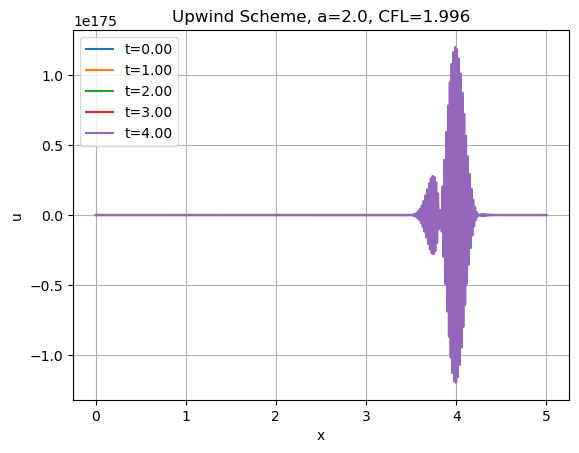

In [13]:
# CFL number 1.996
# Define parameters
nx = 500          # Number of spatial points
L = 5.0           # Domain length
dx = L / (nx - 1) # Spatial resolution
dt = 0.01         # Time step (CFL < 1 for stability)
a = 2.0           # Advection speed
T = 5.0           # Total simulation time
Nt = int(T / dt)  # Number of time steps

# For linear advection, CFL=1 is optimal, lower CFL will become more diffusive and dispersive
CFL = a * dt / dx
print(f"Upwind Scheme - CFL Number: {CFL}")

# Spatial grid
x = np.linspace(0, L, nx)

# Initial condition: Gaussian pulse
u = np.exp(-((x - L/4) / 0.1) ** 2)

# Store initial condition for reference
u_init = u.copy()

# Upwind scheme (Stable)
u_new = np.zeros_like(u)

for n in range(Nt):
    # Apply Upwind update (first-order)
    u_new[1:] = u[1:] - CFL * (u[1:] - u[:-1])  # Forward in time, backward in space

    # Periodic boundary condition: Update the first point using the last point
    u_new[0] = u[0] - CFL * (u[0] - u[-1])

    # Update the field
    u[:] = u_new[:]

    # Plot every few steps
    if n % 100 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

# Plot results
# plt.plot(x, u_init, 'k--', label="Initial Condition")
plt.legend()
plt.xlabel("x")
plt.grid()
plt.ylabel("u")
plt.title("Upwind Scheme, a=2.0, CFL=1.996")
plt.savefig('plots/upwind_1d_cfl_1996.png')
plt.show()

Upwind Scheme - CFL Number: 0.49900000000000005


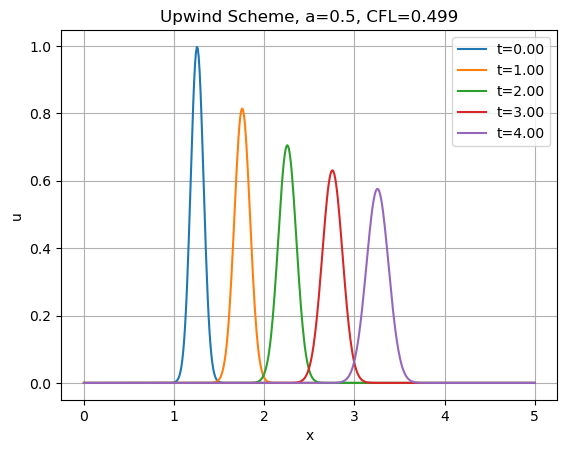

In [14]:
# CFL Number 0.499
# Define parameters
nx = 500          # Number of spatial points
L = 5.0           # Domain length
dx = L / (nx - 1) # Spatial resolution
dt = 0.01         # Time step (CFL < 1 for stability)
a = 0.5           # Advection speed
T = 5.0           # Total simulation time
Nt = int(T / dt)  # Number of time steps

# For linear advection, CFL=1 is optimal, lower CFL will become more diffusive and dispersive
CFL = a * dt / dx
print(f"Upwind Scheme - CFL Number: {CFL}")

# Spatial grid
x = np.linspace(0, L, nx)

# Initial condition: Gaussian pulse
u = np.exp(-((x - L/4) / 0.1) ** 2)

# Store initial condition for reference
u_init = u.copy()

# Upwind scheme (Stable)
u_new = np.zeros_like(u)

for n in range(Nt):
    # Apply Upwind update (first-order)
    u_new[1:] = u[1:] - CFL * (u[1:] - u[:-1])  # Forward in time, backward in space

    # Periodic boundary condition: Update the first point using the last point
    u_new[0] = u[0] - CFL * (u[0] - u[-1])

    # Update the field
    u[:] = u_new[:]

    # Plot every few steps
    if n % 100 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

# Plot results
# plt.plot(x, u_init, 'k--', label="Initial Condition")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.grid()
plt.title("Upwind Scheme, a=0.5, CFL=0.499")
plt.savefig('plots/upwind_1d_cfl_0499.png')
plt.show()

Upwind Scheme - CFL Number: 0.2994


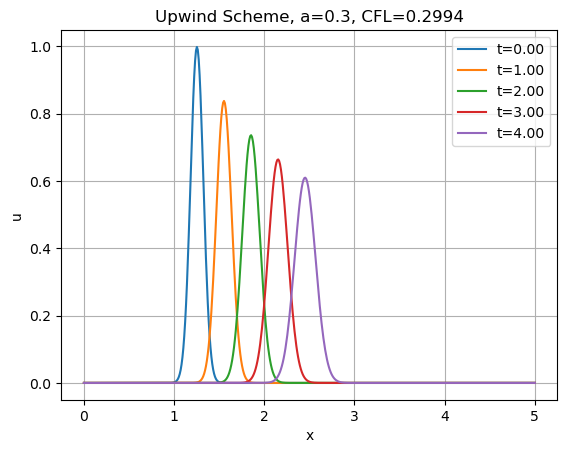

In [15]:
# CFL Number 0.2994
# Define parameters
nx = 500          # Number of spatial points
L = 5.0           # Domain length
dx = L / (nx - 1) # Spatial resolution
dt = 0.01         # Time step (CFL < 1 for stability)
a = 0.3           # Advection speed
T = 5.0           # Total simulation time
Nt = int(T / dt)  # Number of time steps

# For linear advection, CFL=1 is optimal, lower CFL will become more diffusive and dispersive
CFL = a * dt / dx
print(f"Upwind Scheme - CFL Number: {CFL}")

# Spatial grid
x = np.linspace(0, L, nx)

# Initial condition: Gaussian pulse
u = np.exp(-((x - L/4) / 0.1) ** 2)

# Store initial condition for reference
u_init = u.copy()

# Upwind scheme (Stable)
u_new = np.zeros_like(u)

for n in range(Nt):
    # Apply Upwind update (first-order)
    u_new[1:] = u[1:] - CFL * (u[1:] - u[:-1])  # Forward in time, backward in space

    # Periodic boundary condition: Update the first point using the last point
    u_new[0] = u[0] - CFL * (u[0] - u[-1])

    # Update the field
    u[:] = u_new[:]

    # Plot every few steps
    if n % 100 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

# Plot results
# plt.plot(x, u_init, 'k--', label="Initial Condition")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.grid()
plt.title("Upwind Scheme, a=0.3, CFL=0.2994")
plt.savefig('plots/upwind_1d_cfl_02994.png')
plt.show()